In [72]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from statistics import mean

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['ysnp.csv']


# Importing

In [51]:
df = pd.read_csv('../input/ysnp.csv')
df.head(4)

,Recreation Visits,LowestTemperature(F),HighestTemperature(F),WarmestMinimumTemperature(F),ColdestMaximumTemperature(F),AverageMinimumTemperature(F),AverageMaximumTemperature(F),MeanTemperature(F),TotalPrecipitation(In),TotalSnowfall(In),Max 24hrPrecipitation(In),Max 24hrSnowfall(In),Year/Month/Day,3month Percent Change Airfare Costs,3month Percent Change Food Away From Home Costs,3month Percent Change Gasoline Costs,3month Percent Change Jet Fuel Costs,Consumer Price Index,Consumer Sentiment Index,Unemployment Rate
0,30621,-17.0,37.0,23.0,10.0,8.9,29.3,19.1,1.09,16.1,0.40,6.5,2016/1/1,-0.3,0.6,-7.3,-23.2,0.2,92.0,4.9
1,28091,-17.0,42.0,27.0,2.0,6.3,29.9,18.1,0.77,8.8,0.23,3.0,2015/1/1,-3.8,0.8,-28.4,-30.1,-0.5,98.1,5.7
2,26778,-19.0,41.0,26.0,5.0,3.8,27.1,15.5,1.28,14.1,0.25,2.5,2014/1/1,-3.6,0.5,4.2,5.7,0.4,81.2,6.6
3,24699,-22.0,43.0,30.0,6.0,1.2,23.5,12.3,0.61,11.5,0.17,3.8,2013/1/1,3.8,0.4,-8.1,-0.5,0.3,73.8,8.0


# Cleaning

In [53]:
dates = pd.to_datetime(df['Year/Month/Day'], infer_datetime_format=True)
df = df.drop('Year/Month/Day', axis=1)

df['day'] = dates.apply(lambda x: x.day)
df['month'] = dates.apply(lambda x: x.month)
df['year'] = dates.apply(lambda x: x.year)


df.head(4)

,Recreation Visits,LowestTemperature(F),HighestTemperature(F),WarmestMinimumTemperature(F),ColdestMaximumTemperature(F),AverageMinimumTemperature(F),AverageMaximumTemperature(F),MeanTemperature(F),TotalPrecipitation(In),TotalSnowfall(In),Max 24hrPrecipitation(In),Max 24hrSnowfall(In),3month Percent Change Airfare Costs,3month Percent Change Food Away From Home Costs,3month Percent Change Gasoline Costs,3month Percent Change Jet Fuel Costs,Consumer Price Index,Consumer Sentiment Index,Unemployment Rate,day,month,year
0,30621,-17.0,37.0,23.0,10.0,8.9,29.3,19.1,1.09,16.1,0.40,6.5,-0.3,0.6,-7.3,-23.2,0.2,92.0,4.9,1,1,2016
1,28091,-17.0,42.0,27.0,2.0,6.3,29.9,18.1,0.77,8.8,0.23,3.0,-3.8,0.8,-28.4,-30.1,-0.5,98.1,5.7,1,1,2015
2,26778,-19.0,41.0,26.0,5.0,3.8,27.1,15.5,1.28,14.1,0.25,2.5,-3.6,0.5,4.2,5.7,0.4,81.2,6.6,1,1,2014
3,24699,-22.0,43.0,30.0,6.0,1.2,23.5,12.3,0.61,11.5,0.17,3.8,3.8,0.4,-8.1,-0.5,0.3,73.8,8.0,1,1,2013


# EDA

In [49]:
df.describe()

,Recreation Visits,LowestTemperature(F),HighestTemperature(F),WarmestMinimumTemperature(F),ColdestMaximumTemperature(F),AverageMinimumTemperature(F),AverageMaximumTemperature(F),MeanTemperature(F),TotalPrecipitation(In),TotalSnowfall(In),Max 24hrPrecipitation(In),Max 24hrSnowfall(In),3month Percent Change Airfare Costs,3month Percent Change Food Away From Home Costs,3month Percent Change Gasoline Costs,3month Percent Change Jet Fuel Costs,Consumer Price Index,Consumer Sentiment Index,Unemployment Rate,day,month,year
count,372.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,367.000000,368.000000,367.000000,333.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.0,372.000000,372.000000
mean,255659.575269,3.595109,67.986413,35.589674,34.326087,20.367120,53.124728,36.752717,1.334158,7.475204,0.425163,2.408174,0.755856,0.712097,1.085484,1.770699,0.211559,87.336559,6.039516,1.0,6.500000,2001.000000
std,291752.719266,20.326267,17.767414,9.916139,20.862001,13.754125,18.888803,16.132182,0.798018,8.824807,0.259295,2.689179,3.783310,0.265519,9.621988,15.672288,0.327205,11.938987,1.465864,0.0,3.456702,8.956318
min,6261.000000,-46.000000,34.000000,12.000000,-27.000000,-11.900000,15.600000,1.900000,0.000000,0.000000,0.000000,0.000000,-9.900000,0.100000,-52.000000,-51.500000,-1.900000,55.300000,3.800000,1.0,1.000000,1986.000000
25%,24485.500000,-15.000000,51.000000,28.000000,18.000000,7.700000,35.575000,22.150000,0.767500,0.000000,0.240000,0.000000,-1.600000,0.500000,-3.000000,-8.000000,0.100000,79.275000,5.000000,1.0,3.750000,1993.000000
50%,55627.500000,7.000000,71.000000,35.000000,35.500000,21.700000,53.100000,37.800000,1.200000,4.500000,0.390000,2.000000,0.600000,0.700000,0.700000,0.750000,0.200000,90.100000,5.650000,1.0,6.500000,2001.000000
75%,509026.500000,21.000000,84.000000,43.000000,50.250000,32.400000,69.650000,51.225000,1.742500,12.200000,0.550000,4.000000,3.100000,0.900000,6.050000,11.200000,0.400000,94.625000,6.900000,1.0,9.250000,2009.000000
max,995917.000000,38.000000,98.000000,57.000000,76.000000,45.800000,88.500000,67.100000,5.780000,40.700000,1.670000,12.000000,13.400000,1.500000,45.100000,76.000000,1.200000,112.000000,10.000000,1.0,12.000000,2016.000000


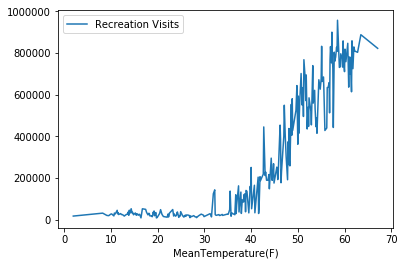

In [93]:
sns.lineplot(data=df[['Recreation Visits', 'MeanTemperature(F)']].groupby('MeanTemperature(F)').mean())

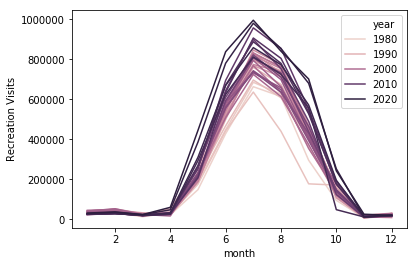

In [54]:
sns.lineplot(x="month", y="Recreation Visits",hue="year", data=df)

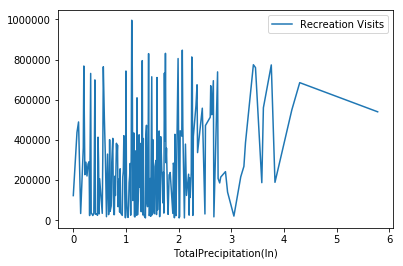

In [95]:
sns.lineplot(data=df[['Recreation Visits', 'TotalPrecipitation(In)']].groupby('TotalPrecipitation(In)').mean())

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


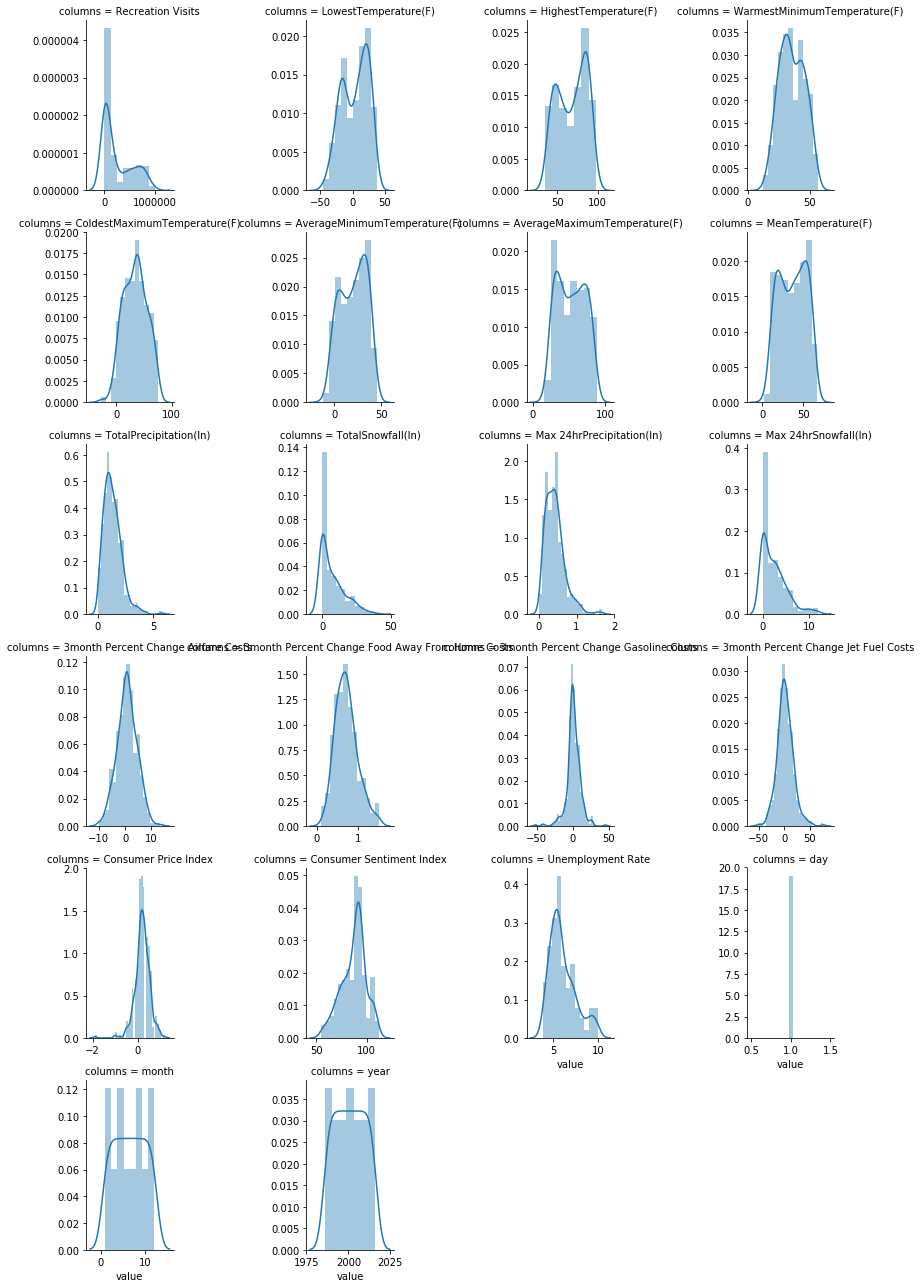

In [32]:
dfm = df.melt(var_name='columns')
g = sns.FacetGrid(dfm, col='columns',col_wrap=4,sharex=False,sharey=False)
g = g.map(sns.distplot, 'value')

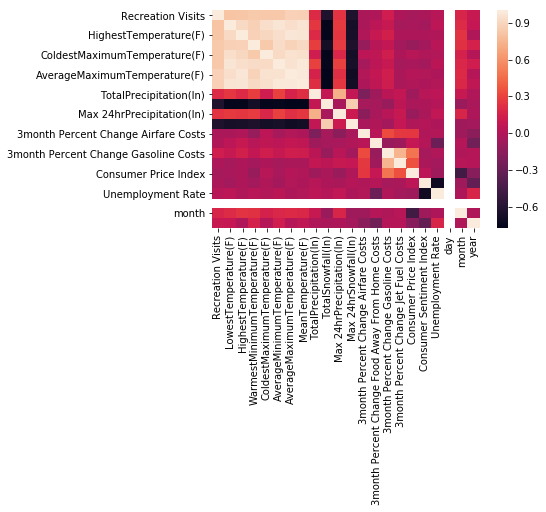

In [34]:
sns.heatmap(df.corr())

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


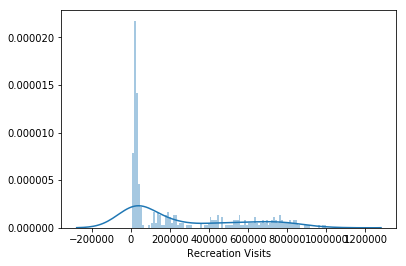

In [106]:
sns.distplot(df["Recreation Visits"], bins=100)

In [98]:
df.dtypes

Recreation Visits                                    int64
LowestTemperature(F)                               float64
HighestTemperature(F)                              float64
WarmestMinimumTemperature(F)                       float64
ColdestMaximumTemperature(F)                       float64
AverageMinimumTemperature(F)                       float64
AverageMaximumTemperature(F)                       float64
MeanTemperature(F)                                 float64
TotalPrecipitation(In)                             float64
TotalSnowfall(In)                                  float64
Max 24hrPrecipitation(In)                          float64
Max 24hrSnowfall(In)                               float64
3month Percent Change Airfare Costs                float64
3month Percent Change Food Away From Home Costs    float64
3month Percent Change Gasoline Costs               float64
3month Percent Change Jet Fuel Costs               float64
Consumer Price Index                               float